# Grover Algorithm using 2 Qubit

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
import qiskit as q
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def initialize(qc):
    """Apply a H-gate to the 2 qubits in qc"""
    qc.h(0)
    qc.h(1)
    qc.barrier()

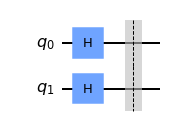

In [3]:
grover_circuit =  q.QuantumCircuit(2)#Create a 2 qubit quantum circuit
# Call the initialize function
initialize(grover_circuit)
grover_circuit.draw('mpl')

In [4]:
def oracle_11(qc):
    """Apply a controlled Z gate with qubit 0 as control and qubit 1 as target"""
    qc.cz(0,1)
    qc.barrier()

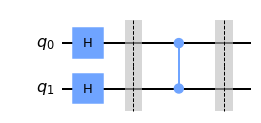

In [5]:
# Call the oracle_11 function
oracle_11(grover_circuit)
grover_circuit.draw('mpl')

In [6]:
def u_g(qc):
    """Apply the gates necessary for the diffusion operator"""
    qc.h(0)
    qc.h(1)
    qc.z(0)
    qc.z(1)
    qc.cz(0,1)
    qc.h(0)
    qc.h(1)
    qc.barrier()

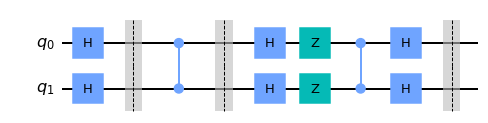

In [7]:
# Call the u_g functionm
u_g(grover_circuit)
grover_circuit.draw('mpl')

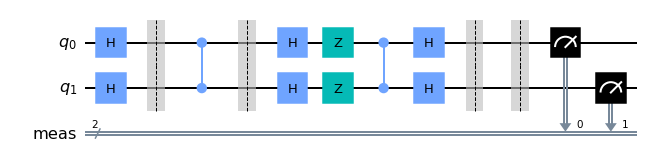

In [8]:
grover_circuit.measure_all()
grover_circuit.draw('mpl')

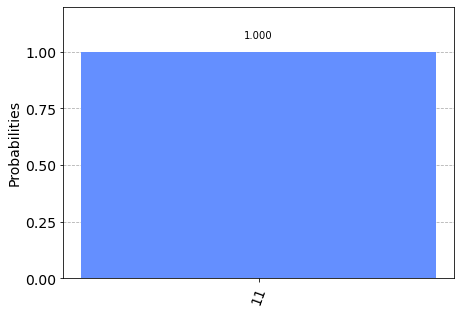

In [9]:
# Simulating the Circuit

backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(grover_circuit, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)